In [269]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('dataset.csv')

Data Quality

In [16]:
data.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [271]:
data.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [17]:
I=data.index
J=data.columns

In [18]:
#which column has missing value
numrecords=len(data)
numrecords
for j in J:
    print(j,data[j].count() * 100 / numrecords)

Id 100.0
EmployeeName 100.0
JobTitle 100.0
BasePay 99.5903238393
OvertimePay 99.9973091878
OtherPay 99.9973091878
Benefits 75.6730394069
TotalPay 100.0
TotalPayBenefits 100.0
Year 100.0
Notes 0.0
Agency 100.0
Status 0.0


In [20]:
# replace NAN with zero, from excel we know that there is no missing value in those columns
data['BasePay'].fillna(0,inplace=True)
data['OvertimePay'].fillna(0,inplace=True)
data['OtherPay'].fillna(0,inplace=True)
data['Benefits'].fillna(0,inplace=True)

data.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [21]:
numrecords=len(data)
numrecords
for j in J:
    print(j,data[j].count() * 100 / numrecords)

Id 100.0
EmployeeName 100.0
JobTitle 100.0
BasePay 100.0
OvertimePay 100.0
OtherPay 100.0
Benefits 100.0
TotalPay 100.0
TotalPayBenefits 100.0
Year 100.0
Notes 0.0
Agency 100.0
Status 0.0


In [22]:
dim=data.shape
dim

(148654, 13)

In [281]:
# for catergorial variables
len(data['EmployeeName'].unique())

110811

In [274]:
len(data['JobTitle'].unique())

1637

In [275]:
len(data['Year'].unique())

4

In [279]:
data['Year'].value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

In [276]:
len(data['Agency'].unique()) 

1

In [280]:
data['Agency'].value_counts() # all records in SF and no missing value in this field.

San Francisco    148654
Name: Agency, dtype: int64

### Q1. the average of BasePay

In [23]:
np.mean(data['BasePay'])

66053.72928809702

 ### Q2.What are the TotalBenefits of JOSEPH DRISCOLL?
 A: Because it is case sensetivity and different format of name, so I plan to make them all in uppercase 
 and just remain Fisrt name and Last name

In [24]:
# uppercase
for i in I:
    data.loc[i,'EmployeeName']=data.loc[i,'EmployeeName'].upper()

In [57]:
# remain first_name and last_name
for i in I:
    a=data.loc[i,'EmployeeName'].split()
    if a[len(a)-1]=='JR' or a[len(a)-1]=='III': #some name have "JR" or "III" at the end
        b=" ".join([a[0],a[len(a)-2]])
    else:
        b=" ".join([a[0],a[len(a)-1]])
    data.loc[i,'EmployeeName_FL']=b

In [58]:
data.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,EmployeeName_FL
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN,San Francisco,NaN,NATHANIEL FORD
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN,San Francisco,NaN,GARY JIMENEZ
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN,San Francisco,NaN,ALBERT PARDINI
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHRISTOPHER CHONG
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN,San Francisco,NaN,PATRICK GARDNER
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.0,316285.74,316285.74,2011,NaN,San Francisco,NaN,DAVID SULLIVAN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.0,315981.05,315981.05,2011,NaN,San Francisco,NaN,ALSON LEE
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.0,307899.46,307899.46,2011,NaN,San Francisco,NaN,DAVID KUSHNER
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.0,303427.55,303427.55,2011,NaN,San Francisco,NaN,MICHAEL MORRIS
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.0,302377.73,302377.73,2011,NaN,San Francisco,NaN,JOANNE HAYES-WHITE


In [59]:
np.sum(data.loc[data['EmployeeName_FL']=='JOSEPH DRISCOLL',['Benefits']])

Benefits    143522.76
dtype: float64

### Q3.Highest paid person by name?

In [62]:
## considered TotalPayBenefits and total salary in 4 years
a=data.groupby('EmployeeName_FL').agg({'TotalPayBenefits': np.sum})
a.sort_values(by='TotalPayBenefits',ascending=False).head(1)

,TotalPayBenefits
EmployeeName_FL,
KEVIN LEE,4321420.67


In [63]:
## considered TotalPay
a=data.groupby('EmployeeName_FL').agg({'TotalPay': np.sum})
a.sort_values(by='TotalPay',ascending=False).head(1)

,TotalPay
EmployeeName_FL,
KEVIN LEE,3464378.9


### Q4. What was the average (mean) BasePay of all employees per year? (2011-2014) ? 

In [64]:
data.groupby('Year').agg({'BasePay': np.mean})

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,68509.832156
2014,66557.437750


### Q5. How many Job Titles were represented by only one person in 2013

In [65]:
# Same problem with case sensetivity, we solve this problem first by capitalizing all letters.
for i in I:
    data.loc[i,'JobTitle']=data.loc[i,'JobTitle'].upper()

In [66]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,EmployeeName_FL
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN,San Francisco,NaN,NATHANIEL FORD
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN,San Francisco,NaN,GARY JIMENEZ
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN,San Francisco,NaN,ALBERT PARDINI
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,NaN,San Francisco,NaN,CHRISTOPHER CHONG
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN,San Francisco,NaN,PATRICK GARDNER


In [67]:
a=data[data['Year']==2013].groupby('JobTitle').count()
a.loc[a['Id']==1,['Id']].count()

Id    202
dtype: int64

### Q6.How many people have the word Chief in their job title?

In [68]:
count=0
for i in I:
    if "CHIEF" in data.loc[i,'JobTitle']:
        count = count + 1

In [69]:
count

627

### Q7.Is there a correlation between length of the Job Title string and Salary

In [118]:
#based on TotalPayBenefits
lenJob_total=[]
for i in I:
    lenJob_total.append([len(data.loc[i,'JobTitle']),data.loc[i,'TotalPayBenefits']])
lenJob_total=pd.DataFrame(lenJob_total,index=I,columns=['JobgTitle_Length','TotalPayBenefits'])

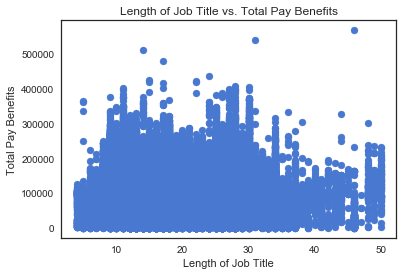

The correlation between length of the Job Title string and Total Pay Benefits is -0.0368784459326


In [125]:
plt.scatter(lenJob_total.JobgTitle_Length, lenJob_total.TotalPayBenefits)
plt.title('Length of Job Title vs. Total Pay Benefits')
plt.xlabel('Length of Job Title')
plt.ylabel('Total Pay Benefits')
plt.show()
corr1=lenJob_total.JobgTitle_Length.corr(lenJob_total.TotalPayBenefits)
print('The correlation between length of the Job Title string and Total Pay Benefits is',corr1)

In [121]:
lenJob_salary=[]
for i in I:
    lenJob_salary.append([len(data.loc[i,'JobTitle']),data.loc[i,'BasePay']])
lenJob_salary=pd.DataFrame(lenJob_salary,index=I,columns=['JobgTitle_Length','BasePay'])

In [122]:
lenJob_salary.corr()

,JobgTitle_Length,BasePay
JobgTitle_Length,1.000000,-0.005507
BasePay,-0.005507,1.000000


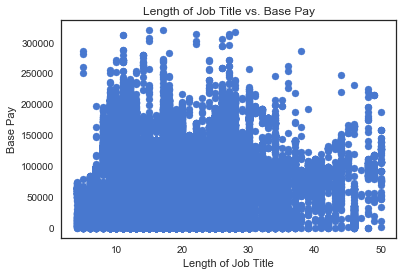

The correlation between length of the Job Title string and Base Pay is -0.00550747361427


In [126]:
plt.scatter(lenJob_salary.JobgTitle_Length, lenJob_salary.BasePay)
plt.title('Length of Job Title vs. Base Pay')
plt.xlabel('Length of Job Title')
plt.ylabel('Base Pay')
plt.show()
corr=lenJob_salary.JobgTitle_Length.corr(lenJob_salary.BasePay)
print('The correlation between length of the Job Title string and Base Pay is',corr)

Conclusion: The correlations between length of the Job Title string and Total Pay Benefits and between length of the Job Title string and Base Pay are both small, so there is kind of no correlation between length of the Job Title string and Salary.

### Q8. Show a correlation heatmap of the data

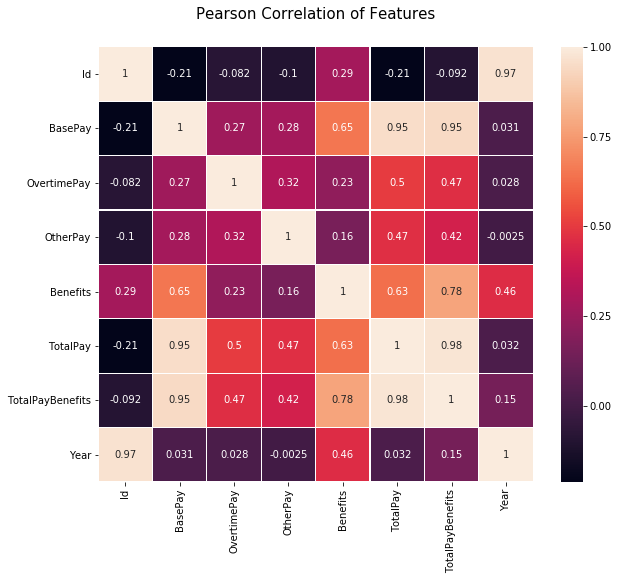

In [106]:
#There is no information in Notes and Status columns, so we leave them out.
plt.figure(figsize=(10,8))  
plt.title('Pearson Correlation of Features',y=1.05,size=15)  
sns.heatmap(data.iloc[:,[0,1,2,3,4,5,6,7,8,9,11]].corr(),linewidths=0.1,vmax=1.0,  
            square=True,linecolor='white',annot=True)  
plt.show()  

### Q9. Largest BasePay by Job

In [130]:
largest_Basepay=data.groupby('JobTitle').agg({'BasePay': np.max})
largest_Basepay.sort_values(by='BasePay',ascending=False)
#the result shows the highest basepay for each job

,BasePay
JobTitle,
CHIEF OF POLICE,319275.01
ASST MED EXAMINER,318835.49
"DEP DIR FOR INVESTMENTS, RET",315572.01
"CHIEF, FIRE DEPARTMENT",313686.01
EXECUTIVE CONTRACT EMPLOYEE,313312.52
DEPT HEAD V,311758.96
"GEN MGR, PUBLIC TRNSP DEPT",305307.89
MAYOR,285446.37
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00


### Q10. Top 30 sectors for SF salary 

In [257]:
# 1. find all title that contain "department"
#count=0
#sectors_salary=[]
#for i in I:
#    if "DEPARTMENT" in data.loc[i,'JobTitle']:
#        sectors_salary.append([data.loc[i,'JobTitle'],data.loc[i,'TotalPayBenefits']])
#sectors_salsry
# the result shows less than 30 sectors

In [128]:
#based on jobtitle & totalpaybenefit
#Since we already know that all records are in SF
largest_Basepay=data.groupby('JobTitle').agg({'TotalPayBenefits': np.max})
largest_Basepay.sort_values(by='TotalPayBenefits',ascending=False).head(30)


,TotalPayBenefits
JobTitle,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
CAPTAIN III (POLICE DEPARTMENT),538909.28
DEPUTY CHIEF 3,510732.68
ASST MED EXAMINER,479652.21
CHIEF INVESTMENT OFFICER,436224.36
CHIEF OF POLICE,425815.28
"CHIEF, FIRE DEPARTMENT",422353.40
"LIEUTENANT, FIRE SUPPRESSION",407274.78
"BATTALION CHIEF, FIRE SUPPRESS",404167.27


### Q11. Is BasePay a good predictor of TotalPay (in this case, just use correlation). Depict a graph with a regression line while also showing their correlation. Interpret the results 

In [111]:
data.BasePay.corr(data.TotalPay)

0.95469259057883882

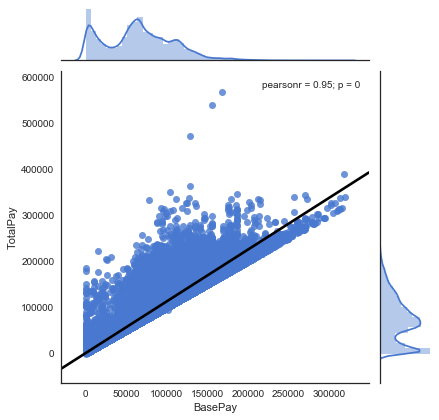

The correlation between Base Pay and Total Pay is 0.95


In [116]:
sns.set(style='white', palette='muted', color_codes=True) 
sns.jointplot(x='BasePay', y='TotalPay', data=data,kind='reg',line_kws={'color':'black'})
#plt.title('Regression Line between Base Pay and Total Pay')
plt.show()
corr=data.BasePay.corr(data.TotalPay)
print('The correlation between Base Pay and Total Pay is {0:.2f}'.format(corr))

Based on the graph and correlation between Base Pay and Total Pay, BasePay and TotalPay have a positive relationship, and BasePay is a good predictor to Total Pay since when BasePay increases, Total Pay will increases.

### Q12.what other interesting insights can you pull from the data?

In [146]:
#time series analysis
#by each year
a=data.groupby('Year').agg({'BasePay': np.mean})
b=data.groupby('Year').agg({'OvertimePay': np.mean})
c=data.groupby('Year').agg({'OtherPay': np.mean})
d=data.groupby('Year').agg({'Benefits': np.mean})
e=data.groupby('Year').agg({'TotalPay': np.mean})
f=data.groupby('Year').agg({'TotalPayBenefits': np.mean})
meanPay=a.join([b,c,d,e,f], how='left')
meanPay

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
Year,,,,,,
2011,63595.956517,4531.065429,3617.081926,0.000000,71744.103871,71744.103871
2012,65436.406857,5023.417824,3653.437583,26439.966967,74113.262265,100553.229232
2013,68509.832156,5281.641980,3819.969007,23829.076572,77611.443142,101440.519714
2014,66557.437750,5401.426941,3505.053449,24787.000743,75463.918140,100250.918884


The benefit in 2011 is zero.

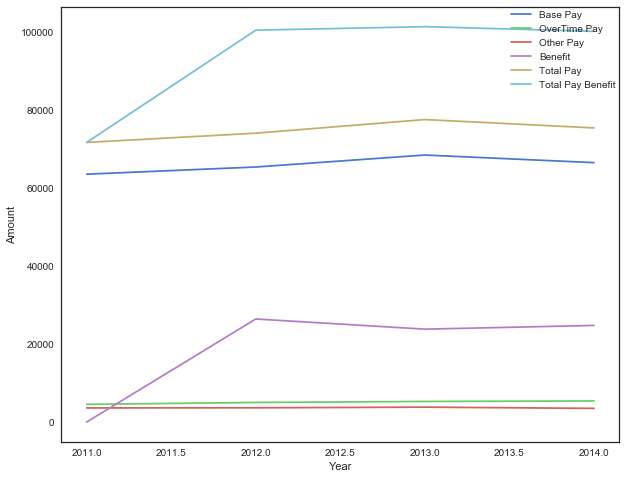

In [265]:
plt.figure(figsize=(10,8))  
plt.plot(a,label='Base Pay')
plt.plot(b,label='OverTime Pay')
plt.plot(c,label='Other Pay')
plt.plot(d,label='Benefit')
plt.plot(e,label='Total Pay')
plt.plot(f,label='Total Pay Benefit')
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.) 
plt.xlabel('Year')
plt.ylabel('Amount')
#plt.xlim(2011,2014)
plt.show()

From the above graph, we learn that in average: 

1.Total Pay and Base Pay have similar trends. Both of them increased from 2011 to 2013, and decreased in 2014.
At previous question, we know that Total Pay and Base Pay have a strong correlation.

2.There is no Benefit in 2011.

3.Benefit and Total Pay Benefit have similar trends. For instance, Benefit and Total Pay Benefit have an increase in 2012. The increase in Benefit in 2012 might cause the increase in Total Pay Benefit in 2012. I would do correlation analysis in next step.

4.Benefit have an obvious decrease in 2013

5.The line of OverTime Pay and Other Pay are flat. Both of them slightly change from 2011-2014. And the amount of them are smaller than others. 

#### Is there a correlation between Benefit and Total Pay Benefit.

In [185]:
data.Benefits.corr(data.TotalPayBenefits)

0.78196308879823806

In [197]:
# since the benefit is zero in 2011, so we shouldn't take those records into account.
data.loc[data['Year']!=2011,['Benefits','TotalPayBenefits']].corr()

,Benefits,TotalPayBenefits
Benefits,1.000000,0.930146
TotalPayBenefits,0.930146,1.000000


In general, the correlation of Benefit and Total Pay Benefit is 0.78. But, when we focus on 2012-2014, there is a strong correlation between Benefit and Total Pay Benefit

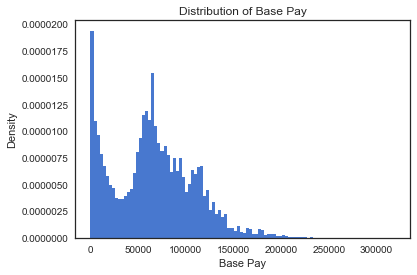

In [308]:
# Distribution 
plt.hist(data.BasePay,bins=100,density=True)
plt.xlabel('Base Pay')
plt.ylabel('Density')
plt.title('Distribution of Base Pay')
plt.show()

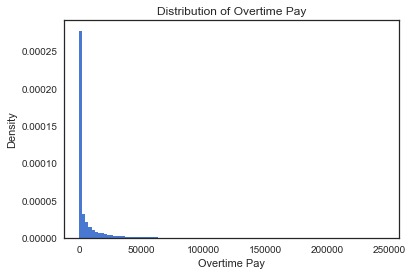

In [288]:
plt.hist(data.OvertimePay,bins=100,density=True)
plt.xlabel('Overtime Pay')
plt.ylabel('Density')
plt.title('Distribution of Overtime Pay')
plt.show()

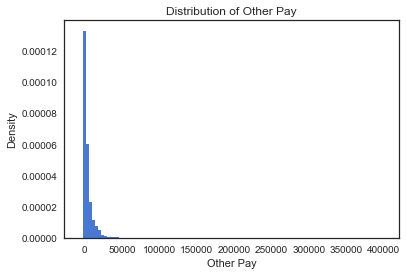

In [298]:
plt.hist(data.OtherPay,bins=100,density=True)
plt.xlabel('Other Pay')
plt.ylabel('Density')
plt.title('Distribution of Other Pay')
plt.show()

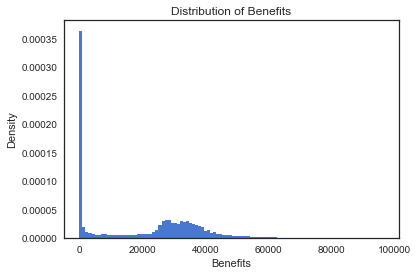

In [300]:
plt.hist(data.Benefits,bins=100,density=True)
plt.xlabel('Benefits')
plt.ylabel('Density')
plt.title('Distribution of Benefits')
plt.show()

Most of Benefits are from 25,000 to 40,000

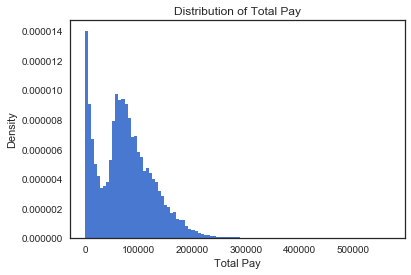

In [292]:

plt.hist(data.TotalPay,bins=100,density=True)
plt.xlabel('Total Pay')
plt.ylabel('Density')
plt.title('Distribution of Total Pay')
plt.show()

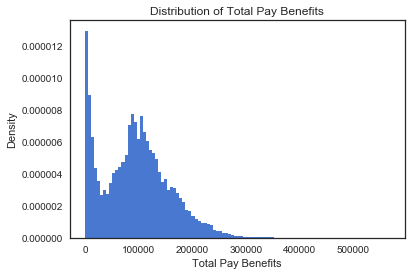

In [295]:
plt.hist(data.TotalPayBenefits,bins=100,density=True)
plt.xlabel('Total Pay Benefits')
plt.ylabel('Density')
plt.title('Distribution of Total Pay Benefits')
plt.show()

1.All of them have a peak in zero.
2.From the distribution of different pays, BasePay, TotalBenefit and TotalPayBenefits have similar distribution, and the majority of records are near average. 

## Bonus 
#### Is there a strong correlation between vowel count in a name and average salary? Create a VowelCount column, and create a plot with these 2 variables. Can you show a correlation between these two variables? Is it a strong one and what is it exactly? 

In [248]:

# caculate average salary per person
#data1=data.groupby('EmployeeName').agg({'TotalPayBenefits': np.mean})

vowel_salary=[]

for i in I:
    count = 0
    for char in data.loc[i,'EmployeeName']: #already capatalized before
        if(char == "A" or char =="E" or char =="I" or char =="O" or char =="U"):
            count = count + 1
    vowel_salary.append([data.loc[i,'EmployeeName'],count,data.loc[i,'TotalPayBenefits']])

vowel_salary=pd.DataFrame(vowel_salary,index=I,columns=['EmployeeName','VowelCount','TotalPayBenefits'])



In [249]:
vowel_salary.head()

,EmployeeName,VowelCount,TotalPayBenefits
0,NATHANIEL FORD,5,567595.43
1,GARY JIMENEZ,4,538909.28
2,ALBERT PARDINI,5,335279.91
3,CHRISTOPHER CHONG,4,332343.61
4,PATRICK GARDNER,4,326373.19


In [250]:
result=vowel_salary.groupby('VowelCount').agg({'TotalPayBenefits': np.mean})
result['VowelCount']=result.index


In [251]:
result.head()

,TotalPayBenefits,VowelCount
VowelCount,,
1,108116.844390,1
2,94201.231001,2
3,98048.203516,3
4,95656.300162,4
5,94106.458011,5


In [252]:
result.VowelCount.corr(result.TotalPayBenefits)
#the correlation coefficient is -0.06, showing that there is really small correlation between these two variables.

-0.0098638827055836497

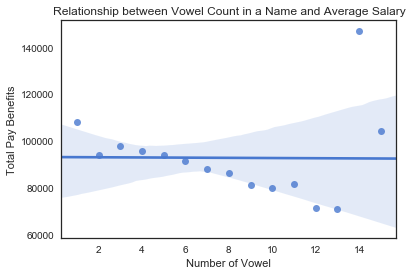

In [256]:
sns.regplot(x='VowelCount', y='TotalPayBenefits', data=result)
plt.title('Relationship between Vowel Count in a Name and Average Salary')
plt.xlabel('Number of Vowel')
plt.ylabel('Total Pay Benefits')
plt.show()

So the correlation is -0.009, which is so small that there is little correlation between Vowel Count in a Name and Average Salary